## Make an occupancy plot

In [3]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import geo_studies, rat_misc
reload(rat_misc)

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


<module 'rat_misc' from '/home/jp/projects/snoplus/python_modules/rat_misc.pyc'>

In [4]:
du = rat.utility()

TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DU::ShadowingCalculator is available


In [5]:
infile='/home/jp/projects/snoplus/data/snoplus/laserball/Analysis_r0000017375_s000_p000.root'

In [6]:
ratreader = None
ratreader = rat_misc.openRat(infile, None, ratreader)

No ratreader file. Opening it for the first time


In [5]:
ds, run = ratreader.next()

In [6]:
event = ds.GetEV(0)

In [7]:
event.

SyntaxError: invalid syntax (<ipython-input-7-64cfe6310195>, line 1)

In [343]:
def getPMTs(ratreader, maxsize = np.inf):
    pmt_list = np.zeros(10000)
    counter = 0
    ev_counter = 0
    for ds, run in ratreader:
        for iEV in range(ds.GetEVCount()):
            event = ds.GetEV(iEV)
            pmts  = event.GetUncalPMTs()
            #print pmts.GetCount()
            for iPMT in range(pmts.GetCount()):
                pmt_id = pmts.GetPMT(iPMT).GetID()
                pmt_list[pmt_id] += 1
                counter += 1
                if counter > maxsize:
                    return pmt_list
        ev_counter += 1
    return pmt_list, ev_counter

In [344]:
pmt_list, ev_counter = getPMTs(ratreader)

In [345]:
tst = pmt_list[pmt_list<9000]

In [347]:
tst.sum()/ev_counter

153.21596584472024

In [354]:
du = rat.utility()

In [ ]:
pmt_positions = np.zeros([pmt_list.size,3])
for i in range(pmt_list.size):
    try:
        pmt_positions[i,:] = np.array(du.GetPMTInfo().GetPosition(i))
    except:
        print 'Maximum reached, exiting', i
        exit_i = i
        break

In [ ]:
pmt_positions = pmt_positions[:exit_i,:]
pmt_list = pmt_list[:exit_i]
pmt_radii = np.sqrt(np.sum(pmt_positions**2,axis=1))
pmt_bool  = (pmt_radii < 8500.)*(pmt_list>0.)
costheta = pmt_positions[pmt_bool,2]/pmt_radii[pmt_bool]
phi      = np.arctan2(pmt_positions[pmt_bool,1], 
                      pmt_positions[pmt_bool,0])

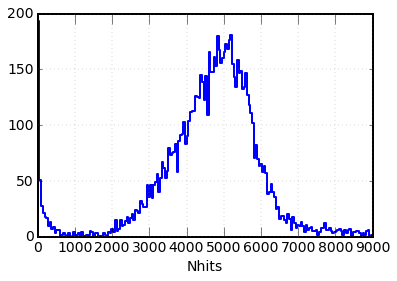

In [249]:
xaxis = np.linspace(1, 9000, 201)
b, x = np.histogram(pmt_list, xaxis)
jplot.unfilledBar(x,b)
plt.xlabel('Nhits')

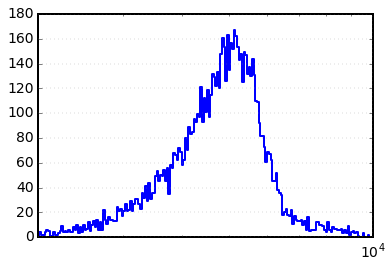

In [255]:
xaxis = 10**np.linspace(3.3, 4., 201)
b, x = np.histogram(pmt_list, xaxis)
jplot.unfilledBar(x,b)
plt.xscale('log')



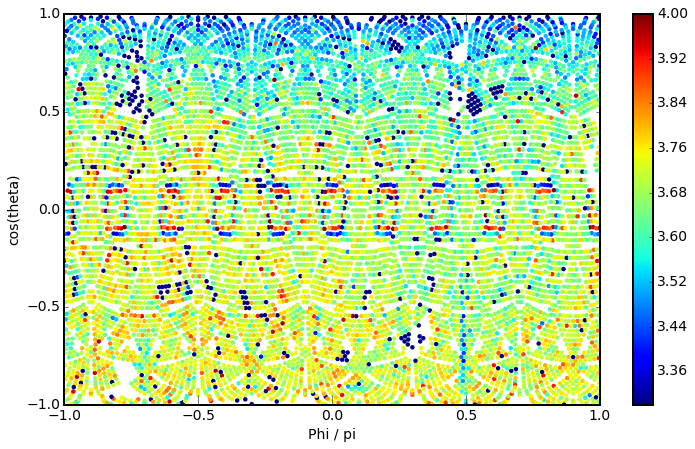

In [257]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi/np.pi, costheta, c=np.log10(pmt_list[pmt_bool]), 
            cmap='jet',vmin=3.3, vmax=4,
            marker='o',lw = 0)
plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()

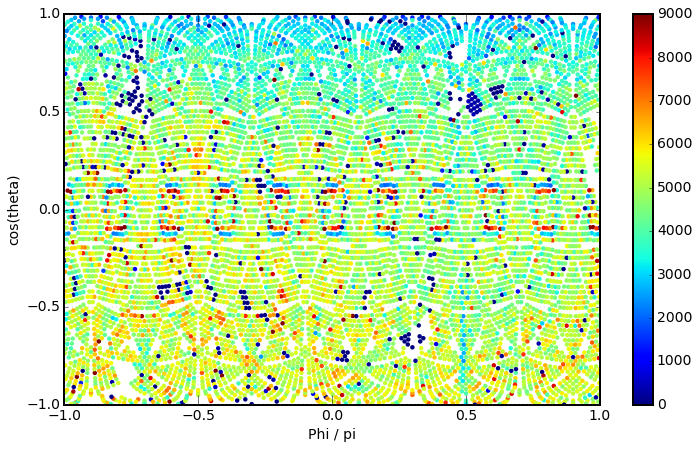

In [260]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi/np.pi, costheta, c=pmt_list[pmt_bool], 
            cmap='jet',vmin=0, vmax=9000,
            marker='o',lw = 0)
plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()

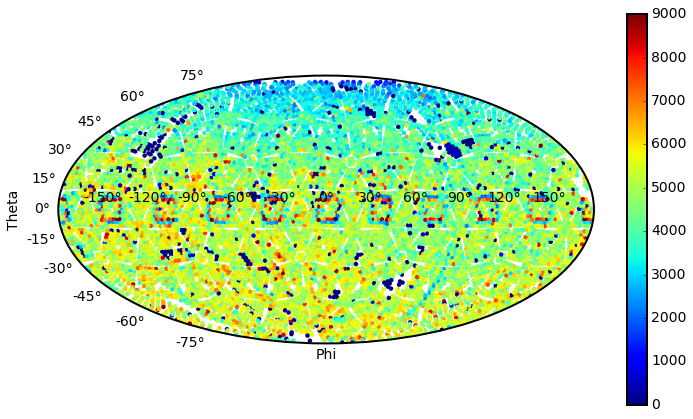

In [270]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='mollweide')
plt.scatter(phi, np.pi/2.-np.arccos(costheta), c=pmt_list[pmt_bool], 
            cmap='jet',vmin=0, vmax=9000,
            marker='o',lw = 0)
plt.colorbar()
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.show()

In [7]:
infile='/home/jp/projects/snoplus/rundir/laserball/central_run/std_central_500.root'

In [8]:
ratreader = None
ratreader = rat_misc.openRat(infile, None, ratreader)

No ratreader file. Opening it for the first time


In [9]:
def getPMTsMC(ratreader, maxsize = np.inf):
    pmt_list = np.zeros(10000)
    counter = 0
    ev_counter = 0
    for ds, run in ratreader:
        ev_counter += 1
        if ev_counter %1000 == 0:
            print 'Event ', ev_counter
        for iEV in range(ds.GetMCEVCount()):
            event = ds.GetMCEV(iEV)
            hits = event.GetMCHits()      
            if ev_counter % 1000 == 0:
                print hits.GetCount()
            for iHit in range(hits.GetCount()):
                pmt_id = hits.GetPMT(iHit).GetID()
                pmt_list[pmt_id] += 1
                counter += 1
                if counter > maxsize:
                    return pmt_list
    return pmt_list

In [10]:
pmt_list = getPMTsMC(ratreader)

Event  1000
372
Event  2000
342
Event  3000
404
Event  4000
352
Event  5000
331
Event  6000
349
Event  7000
362
Event  8000
357
Event  9000
358
Event  10000
372


In [11]:
np.sum(pmt_list)/10000.

358.7251

In [12]:
pmt_positions = np.zeros([pmt_list.size,3])
for i in range(pmt_list.size):
    try:
        pmt_positions[i,:] = np.array(du.GetPMTInfo().GetPosition(i))
    except:
        print 'Maximum reached, exiting', i
        exit_i = i
        break

Maximum reached, exiting 9728


In [13]:
pmt_positions = pmt_positions[:exit_i,:]
pmt_list = pmt_list[:exit_i]
pmt_radii = np.sqrt(np.sum(pmt_positions**2,axis=1))
pmt_bool  = (pmt_radii < 8500.)*(pmt_list>0.)
costheta = pmt_positions[pmt_bool,2]/pmt_radii[pmt_bool]
phi      = np.arctan2(pmt_positions[pmt_bool,1], 
                      pmt_positions[pmt_bool,0])

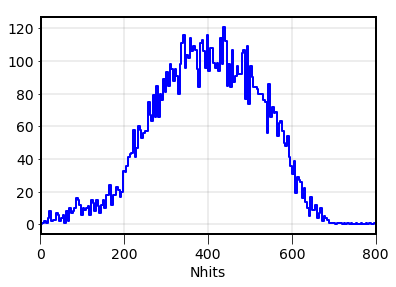

In [14]:
xaxis = np.linspace(1, 800, 201)
b, x = np.histogram(pmt_list, xaxis)
jplot.unfilledBar(x,b)
plt.xlabel('Nhits')

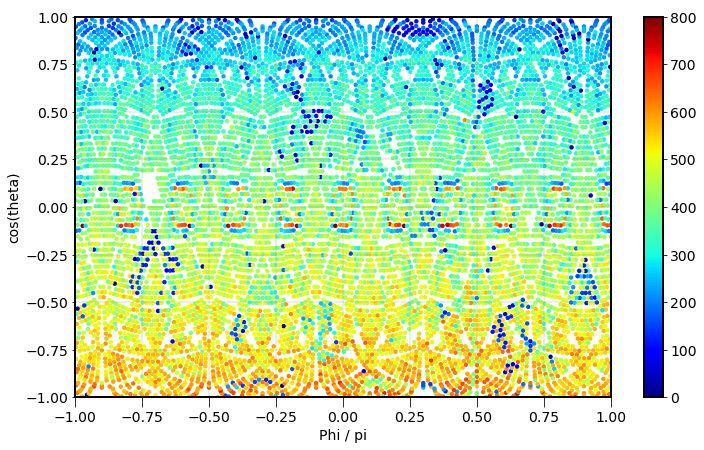

In [20]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi/np.pi, costheta, c=pmt_list[pmt_bool], 
            cmap='jet',vmin=0, vmax=800,
            marker='o', s = 20,lw = 0)
plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()

/home/jp/anaconda2/lib/python2.7/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


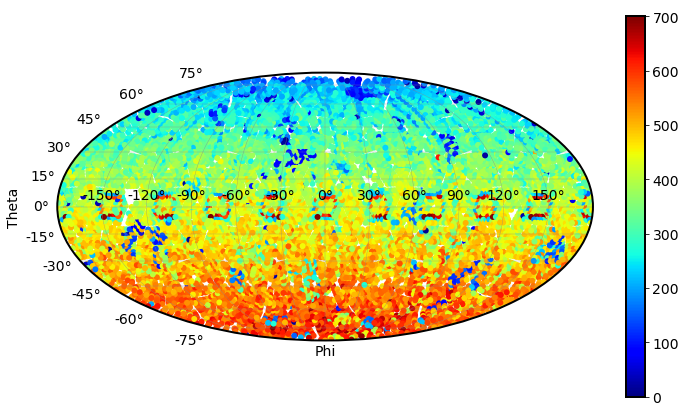

In [16]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='mollweide')
plt.scatter(phi, np.pi/2.-np.arccos(costheta), c=pmt_list[pmt_bool], 
            cmap='jet',vmin=0, vmax=700,
            marker='o',lw = 0)
plt.colorbar()
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.show()